In [30]:
from new_grid import Grid
from graphics import display_grid
from agent import Agent
import matplotlib.pyplot as plt
import json

In [31]:
easy1 = {'train':(1,0),'trainvel':(0,1),'cargo1':(3,2),'num1':1,'target1':(2,2), 'switch':(0,0),'agent':(4,2),'cargo2':(2,4),'num2':2,'target2':(0,3)}

push3 = {"train": (0, 3), "trainvel": (1, 0), "cargo1": (2, 2), "target1": (0, 4), "switch": (2, 4), "agent": (2, 0), "cargo2": (3, 3), "target2": (3, 4),'num1':1, "num2":2}
push12 = {"train": (1, 0), "trainvel": (0, 1), "cargo1": (2, 2), "target1": (3, 1), "switch": (0, 4), "agent": (3, 1), "cargo2": (1, 4), "target2": (0, 3), 'num1':1, 'num2':2}
push14 = {"train": (4, 4), "trainvel": (-1, 0), "cargo1": (1, 3), "target1": (3, 2), "switch": (4, 1), "agent": (0, 2), "cargo2": (0, 4), "target2": (0, 1), 'num1':1, 'num2':2}

swit27 = {"train": (1, 0), "trainvel": (0, 1), "cargo1": (0, 1), "target1": (4, 3), "switch": (3, 3), "agent": (4, 4), "cargo2": (1, 2), "target2": (0, 3), 'num1':1, "num2":2}
swit10 = {"train": (0, 2), "trainvel": (1, 0), "cargo1": (2, 2), "target1": (2, 3), "switch": (4, 0), "agent": (2, 0), "cargo2": (1, 3), "target2": (4, 2), 'num1':1, "num2":2} 

reallyhard45 = {"train": (4, 0), "trainvel": (0, 1), "cargo1": (1, 4), "target1": (2, 3), "switch": (3, 0), "agent": (3, 2), "cargo2": (4, 3), "target2": (3, 3), 'num1':1, "num2":2}


In [60]:
testgrid = Grid(5, random=False, init_pos=reallyhard45)
display_grid(testgrid)

[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' 'S' '^']]
=====


array([['_', '1', '_', '_', '_'],
       ['_', '_', 'a', 'b', '2'],
       ['_', '_', '_', '◉', '_'],
       ['_', '_', '_', '_', '_'],
       ['_', '_', '_', 'S', '^']], dtype='<U1')

In [33]:
agent=Agent()
Q, policy = agent.mc_first_visit_control(testgrid, iters=10000, nn_init=True)
grids,actions,r = agent.run_final_policy(testgrid, Q,nn_init=True,display=True)

neural net loaded
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' 'S' '^']]
=====
(1, 0)
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' '◉' '^']
 ['_' '_' '_' 'S' '_']]
=====
(0, 0)
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '_' '^']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' 'S' '_']]
=====
(1, 0)
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '<' '_']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' 'S' '_']]
=====
(0, 0)
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '<' '_' '_']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' 'S' '_']]
=====
(0, 0)
0


In [62]:
def run_both(testgrid,iterlist,num):
    dual = [0]*len(iterlist)
    based = [0]*len(iterlist)
    agent = Agent()

    for idx,iters in enumerate(iterlist):
        for i in range(num):
            Q, policy = agent.mc_first_visit_control(testgrid, iters=iters, nn_init=True)
            grids,actions,r = agent.run_final_policy(testgrid.copy(), Q,nn_init=True,display=False)
            dual[idx] += r

            Q, policy = agent.mc_first_visit_control(testgrid, iters=iters, nn_init=False)
            grids,actions,r = agent.run_final_policy(testgrid.copy(), Q,nn_init=False,display=False)
            based[idx] += r


    dual = [x/num for x in dual]
    based = [x/num for x in based]
    return dual,based

dual,based = run_both(testgrid,[0,100,200,300,400,500],1)
print(dual,based)

neural net loaded
[-4.0, 0.0, -2.0, -2.0, -2.0, 0.0] [-2.0, -2.0, 0.0, 0.0, 0.0, -2.0]


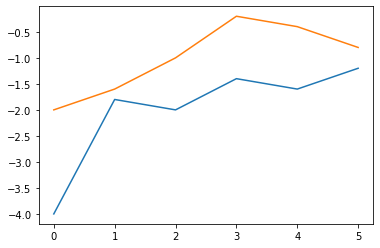

In [58]:
plt.plot(dual, label = "dual")
plt.plot(based, label = "based")

In [103]:
with open('gridworld_experiment/test_data.json') as json_file:
    json_data = json.load(json_file)
    
for grid in json_data:
    for pos in json_data[grid]:
        if type(json_data[grid][pos])==list: 
            json_data[grid][pos] = tuple(json_data[grid][pos])
    json_data[grid]['num1'] = 1
    json_data[grid]['num2'] = 2
    grid = Grid(init_pos=json_data[grid])
    print(run_both(grid,[0,20,30,50,100],10))
    print(try_all(grid))
    
            
    

neural net loaded
([0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0])
defaultdict(<class 'int'>, {0: 2204, -4: 920, 1: 1})
neural net loaded
([0.0, -0.2, 0.0, 0.0, 0.0], [-2.0, -2.0, -2.0, -2.0, -1.4])
defaultdict(<class 'int'>, {-4: 740, 0: 260, -2: 2125})
neural net loaded
([2.0, 1.8, 2.0, 2.0, 2.0], [0.0, 0.0, 0.1, 0.2, 1.0])
defaultdict(<class 'int'>, {0: 2418, -4: 590, -2: 65, 2: 41, 1: 11})
neural net loaded
([2.0, 1.8, 2.0, 2.0, 1.6], [0.0, 0.2, 0.0, 0.4, 0.4])
defaultdict(<class 'int'>, {0: 3067, -4: 40, 2: 18})
neural net loaded
([-1.0, -1.0, -1.0, -1.0, -1.0], [-1.0, -1.0, -1.0, -1.0, -1.0])
defaultdict(<class 'int'>, {-1: 3125})
neural net loaded
([0.0, 2.0, 2.0, 1.8, 1.6], [0.0, 0.0, 0.0, 0.2, 0.4])
defaultdict(<class 'int'>, {0: 2883, -4: 230, 2: 12})
neural net loaded
([0.0, -0.2, 0.0, 0.0, 0.0], [-2.0, -1.6, -0.4, 0.0, 0.0])
defaultdict(<class 'int'>, {-2: 1500, -4: 970, 0: 655})
neural net loaded
([1.0, 0.8, 1.0, 0.9, 1.0], [-2.0, 0.2, 0.3, 0.3, 0.3])
defaultdict(<cl

In [77]:
from collections import defaultdict

actions = [(-1,0),(0,-1),(1,0),(0,1),(0,0)]
all_possible = []
for i in range(5):
    for j in range(5):
        for k in range(5):
            for l in range(5):
                for m in range(5):
                    all_possible.append([actions[i],actions[j],actions[k],actions[l],actions[m]])

def try_all(grid):
    reward_dict = defaultdict(int)
    for policy in all_possible:
        g = grid.copy()
        r = 0
        for action in policy:
            r += g.R(action)
            g.T(action)
        reward_dict[r] += 1
    return reward_dict
